<a href="https://colab.research.google.com/github/Indongspace/mulcamp34/blob/main/ml_2%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9736842105263158


[Text(0.4, 0.9, 'x[3] <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[3] <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.7, 0.3, 'x[3] <= 1.65\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

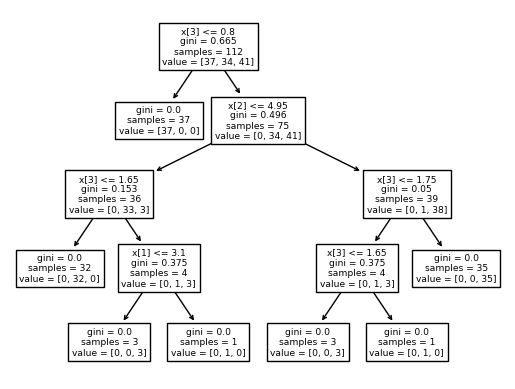

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 데이터 불러오기
iris = load_iris()
# 데이터 가공
X = iris.data # 독립변수 가져오는 코드
y = iris.target # 종속변수 가져오는 코드
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
# 모델링
clf = DecisionTreeClassifier(max_depth=5,random_state=0) # 디폴트 모델
# 모델 학습
clf.fit(X_train,y_train)
# 예측 데이터 생성
pred = clf.predict(X_test)
# 평가지표
print(accuracy_score(y_test,pred))

tree.plot_tree(clf)

## Grid Search vs Random Search 차이점, 최근 트렌드 동향
    + 베이지안 서치

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

# 파라미터 딕셔너리 형태로 설정
parameters = {
    'max_depth' : [1,2,3],
    'min_samples_split' : [2,3]
}

In [ ]:
import pandas as pd

# Gride Search
grid_dtree = GridSearchCV(dtree,param_grid = parameters,cv=3,refit=True) # 가장 좋은 파라미터 설정으로 재학습 시킴
# Grid Search 학습
grid_dtree.fit(X_train,y_train) # 3 * 2 = 6
# 결과 추출
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002505,0.001064,0.002341,0.000465,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.700,0.7,0.70,0.700000,1.110223e-16,5
1,0.002676,0.000480,0.002516,0.000413,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.700,0.7,0.70,0.700000,1.110223e-16,5
2,0.002010,0.000701,0.001346,0.000460,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.925,1.0,0.95,0.958333,3.118048e-02,3
3,0.002511,0.000725,0.002010,0.000022,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.925,1.0,0.95,0.958333,3.118048e-02,3
4,0.002371,0.000264,0.001656,0.000952,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.975,1.0,0.95,0.975000,2.041241e-02,1
5,0.001865,0.000838,0.002499,0.000705,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.975,1.0,0.95,0.975000,2.041241e-02,1


In [ ]:
# 최적의 파라미터
grid_dtree.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
grid_dtree.best_score_

0.975

In [ ]:
estimator = grid_dtree.best_estimator_ # 재학습
estimator

DecisionTreeClassifier(max_depth=3)

In [ ]:
pred = estimator.predict(X_test)
accuracy_score(y_test,pred)

0.9666666666666667

## 데이터 전처리- Feature Engineering

In [ ]:
from sklearn.preprocessing import LabelEncoder

#     [ 0,     1,        4,        5,       3,      3,      2,     2 ]
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder 를 객체 생성, fit, transform 으로 label 인코딩 수행
# 종속변수에 적용
# 수치예측할 때, LabelEncoder 사용 (x)
# 범주예측 : 양성/음성/모르겠음 일때 임의적으로 바꿔줌
# 문자열 값을 숫자형 카테고리 값으로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels

array([0, 1, 4, 5, 3, 3, 2, 2])

In [ ]:
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [ ]:
encoder.inverse_transform([4,5,2])

array(['전자레인지', '컴퓨터', '믹서'], dtype='<U5')

## p.118
- 몇몇 ML 알고리즘에는 무지성 적용하기 곤란하다!!
      + 회귀계열 알고리즘, 서포트벡터머신
- 트리계열 알고리즘에넌 상관없다!!

## 원-핫 인코딩
- 문자를 숫자로 변경하는 것, Label Encoding과의 차이점

In [ ]:
# p.119
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 nparray로 변환한다.
items = np.array(items).reshape(-1,1)
print(items.shape)

# 원-핫 인코딩을 적용한다.
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)
oh_labels.toarray()

(8, 1)


array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [ ]:
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [ ]:
df

,item
0,TV
1,냉장고
2,전자레인지
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


## 피처 스케일링과 정규화
- 기본값으로 무조건 사용
  + ML 알고리즘 여부 상관없이, default
- 수치 데이터, 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업
  + 판매데이터
      * 광고투입비용, 온도, 판매량, 매출액
- 만약, 트리계열 알고리즘
  + 굳이 표준화, 정규화 필요 없음
- SVM, KNN, 베이지안, 다양한 알고리즘 사용
  + 꼭 활용

### StandardScaler
- 평균이 0이고, 분산이 1인 값으로 변환해준다.
  + 표준정규분포로 변환하겠다.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다.
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


### StandardScaler 객체 생성
- 각 피처, 수치형컬럼, 한번에 표준화를 해보겠다

In [ ]:
#p.124
from sklearn.preprocessing import StandardScaler

#객체 생성
scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled = pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
#iris_scaled
print('feature 들의 평균 값')
print(iris_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## MinMaxScaler
- 수치 데이터를 0과 1 사이의 범위 값으로 변환
  + 만약, 음수가 존재하면 -1에서 1값으로 변환

### 탐색적 데이터 분석
- EDA : 기초통계, 기술통계량, 시각화
- 수치 데이터 정밀하게 다 분류를 해야 함 : standardscaler, minmaxscaler, robustscaler, absMaxscaler
- 범주 데이터 정밀하게 다 분류를 해야 함 : Ordinal Encoding, Label Encoding, One-Hot Encoding

In [ ]:
# p.125
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)
iris_scaled = pd.DataFrame(data=iris_scaled,columns=iris.feature_names)
#iris_scaled
print('feature 들의 평균 값')
print(iris_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_scaled.var())

feature 들의 평균 값
sepal length (cm)    0.428704
sepal width (cm)     0.440556
petal length (cm)    0.467458
petal width (cm)     0.458056
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.052908
sepal width (cm)     0.032983
petal length (cm)    0.089522
petal width (cm)     0.100869
dtype: float64


## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N')
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('N')
print(titanic_df.isnull().sum().sum())

0


In [ ]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [ ]:
titanic_df['Cabin'].value_counts()

Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [ ]:
titanic_df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64

## 데이터 가공
- 파생변수 생성 중요

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # str 활용 한다는 말은 문자열 값을 문자 클래스로 변형해서 처리를 하겠다.
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

## EDA

<Axes: xlabel='Sex', ylabel='Survived'>

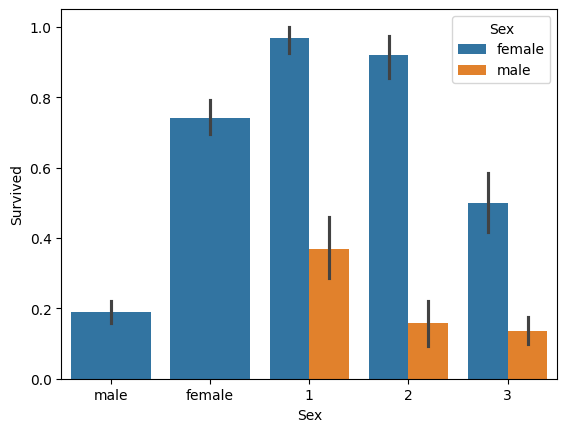

In [ ]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [ ]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'

    return cat

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# 수치 데이터를 가공
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,N,S,Student


## Feature Engineering
- encode_features : 문자 컬럼을 수치로 변형
  + LabelEncoder, One-Hot Encoder 사용 안함
- Sex : male,female 1과0으로 변경
  + 명목척도(One-Hot Encoder), 서열척도(LabelEncoder) 통상적으로
- LabelEncoder vs OrdinalEncoder
  + LabelEncoder : 종속변수
  + OrdinalEncoder : 독립변수

In [ ]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])

    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


### 데이터 전처리 & Feature Engineering
- p.138
- fillna(), drop_features() ==> 데이터 가공
- format_features() 함수는 사용 x
  ==> pipeline 활용할 때만 호출

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

## 데이터셋 분리

In [ ]:
titanic_df = pd.read_csv('data/titanic_train.csv')
titanic_df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [ ]:
y_titanic_df = titanic_df['Survived'] # 종속변수 추출
X_titanic_df = titanic_df.drop('Survived',axis=1) # 독립변수 추출

In [ ]:
X_titanic_df = transform_features(X_titanic_df)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, test_size = 0.2, random_state=11
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

## 모델링

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


### 캐글 대회 전략
- PyCaret 활용, 좋은 모델 후보군 1개
- 1개에 관련된 알고리즘 공부 스터디를 집중
  + 팀별로 논문 스터디 (블로그용)
- 1개의 알고리즘 선택 후, 랜덤서치 위주로 사용하는 것을 권장
  + 빅데이터 분석기사 (혹시 쓸 수 있을까 싶어서)
- Grid Search vs Random Search
  + 일반적으로 Random Search가 학습 시간 및 성능 우세

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []

    # KFold 교차 검증 수행.
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    # 5개 fold에서의 평균 정확도 계산.
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf , folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


## 평가
- cross_val_score 활용

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)

scores

array([0.74301676, 0.7752809 , 0.79213483, 0.78651685, 0.84269663])

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5) # 층화추출 기법
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
